In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

In [3]:
file = 'C:\\dj daily.csv'
df = pd.read_csv(file, skiprows = 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3123 entries, 0 to 3122
Data columns (total 44 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       3123 non-null   object 
 1   mmm        3123 non-null   float64
 2   axp        3123 non-null   float64
 3   aapl       3123 non-null   float64
 4   ba         3123 non-null   float64
 5   amgn       3123 non-null   float64
 6   cat        3123 non-null   float64
 7   cvx        3123 non-null   float64
 8   csco       3123 non-null   float64
 9   ko         3123 non-null   float64
 10  pfe        3123 non-null   float64
 11  gs         3123 non-null   float64
 12  hd         3123 non-null   float64
 13  hon        3123 non-null   float64
 14  ibm        3123 non-null   float64
 15  intc       3123 non-null   float64
 16  jnj        3123 non-null   float64
 17  jpm        3123 non-null   float64
 18  mcd        3123 non-null   float64
 19  mrk        3123 non-null   float64
 20  msft    

In [5]:
df['date'] = pd.to_datetime(df.date, format='%d/%m/%Y').dt.to_period('D')

In [6]:
# Setting Date Index
df.set_index('date', inplace=True)
df.index = df.index.to_timestamp()

# Functions

In [7]:
def adf_statistics(time_series):
    """
    Augmented Dickey-Fuller test for stationarity
    """
    result = adfuller(time_series.values)
    if result[1] < 0.0500:             # result[1] contains the p-value
        return 0                       # returns 0 value if p-value of test is under 5%
    else:
        return 1

In [8]:
def adf_tests(df):
    """
    Augmented Dickey-Fuller test applied to every column in DataFrame
    """
    results = df.apply(adf_statistics, axis=0) # Output is a Pandas series
    if sum(results)==0:
        print('Null hypothesis of non-stationarity is rejected for ALL series with p-values < 5%')
    else:
        for i, v in results.items():
            if v == 1:
                print(f'Null hypothesis of non-stationarity of {i} series is NOT rejected')
            else:
                print(f'Null hypothesis of non-stationarity of {i} series is rejected')    


In [9]:
def transform1(column):
    """
    Log first difference multiplied by 100 transformation (i.e. approximate percent change)
    """
    column = np.log(column).diff() * 100       
    return column


In [10]:
def transform2(column):
    """
    First difference multiplied by 100 transformation
    """
    column = column.diff() * 100       
    return column


In [11]:
def remove_outliers(df):
    """
    Remove outliers (setting their value to missing), defined as observations that are more than 5X 
    the interquartile range from the series mean
    """    
    # Compute the mean and interquartile range
    mean = df.mean()
    iqr = df.quantile([0.25, 0.75]).diff().T.iloc[:, 1]
    
    # Replace entries that are more than 10 times the IQR
    # away from the mean with NaN (denotes a missing entry)
    mask = np.abs(df) > mean + 5 * iqr
    treated = df.copy()
    treated[mask] = np.nan

    return treated

# Tests for Stationarity & Data Transformation

In [12]:
df.head(10)

,mmm,axp,aapl,ba,amgn,cat,cvx,csco,ko,pfe,...,spx_value,dj_mom,dj_tech,spx_oil,vix,oil,copper,us_ois,us_real10,us_yc
date,,,,,,,,,,,,,,,,,,,,,
2009-06-30,60.10,23.24,5.087,42.50,52.94,33.04,66.25,18.65,23.995,14.2192,...,432.8851,21.81,460.57,4739.29,26.35,69.89,225.80,3.5578,1.7640,2.4235
2009-07-01,60.74,23.00,5.101,42.23,52.76,33.19,66.52,18.80,24.590,14.1244,...,434.6396,21.93,463.85,4751.82,26.22,69.31,231.50,3.4909,1.7991,2.4988
2009-07-02,60.25,22.27,5.001,40.83,51.47,31.74,64.42,18.50,24.440,13.7263,...,420.7817,21.30,453.20,4554.51,27.95,66.73,229.00,3.4176,1.8412,2.5131
2009-07-03,60.25,22.27,5.001,40.83,51.47,31.74,64.42,18.50,24.440,13.7263,...,420.7800,21.30,453.20,4554.51,27.95,66.73,229.00,3.3998,1.8411,2.5172
2009-07-06,60.67,23.52,4.950,40.56,52.05,31.70,64.14,18.53,24.500,13.8116,...,422.8593,21.28,450.77,4422.05,29.00,64.05,225.05,3.3612,1.8837,2.5651
2009-07-07,58.76,22.63,4.836,39.04,52.23,30.29,62.70,18.24,24.320,13.8306,...,415.0398,20.92,439.77,4302.95,30.85,62.93,221.40,3.3298,1.8201,2.4893
2009-07-08,59.02,22.72,4.901,39.55,59.50,30.58,62.78,18.13,24.255,13.8495,...,412.2508,20.88,440.02,4271.16,31.30,60.14,214.80,3.1200,1.7706,2.3991
2009-07-09,59.09,22.80,4.870,39.30,58.13,30.65,63.08,18.17,24.355,13.5462,...,413.8306,20.96,442.72,4394.27,29.78,60.41,222.65,3.2463,1.8509,2.4783
2009-07-10,59.79,23.22,4.947,39.65,57.81,30.53,61.40,18.34,24.155,13.4609,...,411.6712,20.97,444.55,4351.16,29.02,59.89,220.05,3.1884,1.7842,2.4028


In [13]:
adf_tests(df)

Null hypothesis of non-stationarity of mmm series is NOT rejected
Null hypothesis of non-stationarity of axp series is NOT rejected
Null hypothesis of non-stationarity of aapl series is NOT rejected
Null hypothesis of non-stationarity of ba series is NOT rejected
Null hypothesis of non-stationarity of amgn series is NOT rejected
Null hypothesis of non-stationarity of cat series is NOT rejected
Null hypothesis of non-stationarity of cvx series is rejected
Null hypothesis of non-stationarity of csco series is NOT rejected
Null hypothesis of non-stationarity of ko series is NOT rejected
Null hypothesis of non-stationarity of pfe series is NOT rejected
Null hypothesis of non-stationarity of gs series is NOT rejected
Null hypothesis of non-stationarity of hd series is NOT rejected
Null hypothesis of non-stationarity of hon series is NOT rejected
Null hypothesis of non-stationarity of ibm series is NOT rejected
Null hypothesis of non-stationarity of intc series is NOT rejected
Null hypothesi

### All variables are found to be non-stationary

In [14]:
# Applying Transform1 function
df1 = df[['mmm', 'axp', 'aapl', 'ba', 'amgn', 'cat', 'cvx', 'csco', 'ko', 'pfe', 'gs', 'hd',
         'hon', 'ibm', 'intc', 'jnj', 'jpm', 'mcd', 'mrk', 'msft', 'nke', 'pg', 'crm', 'trv',
         'unh', 'vz', 'visa', 'wba', 'wmt', 'dis', 'rtx', 'xom', 'spx', 'spx_value', 'dj_mom', 
         'dj_tech', 'spx_oil', 'vix', 'oil', 'copper']].apply(transform1, axis=0)

In [15]:
# Applying Transform2 function
df2 = df[['us_ois', 'us_real10', 'us_yc']].apply(transform2, axis=0)

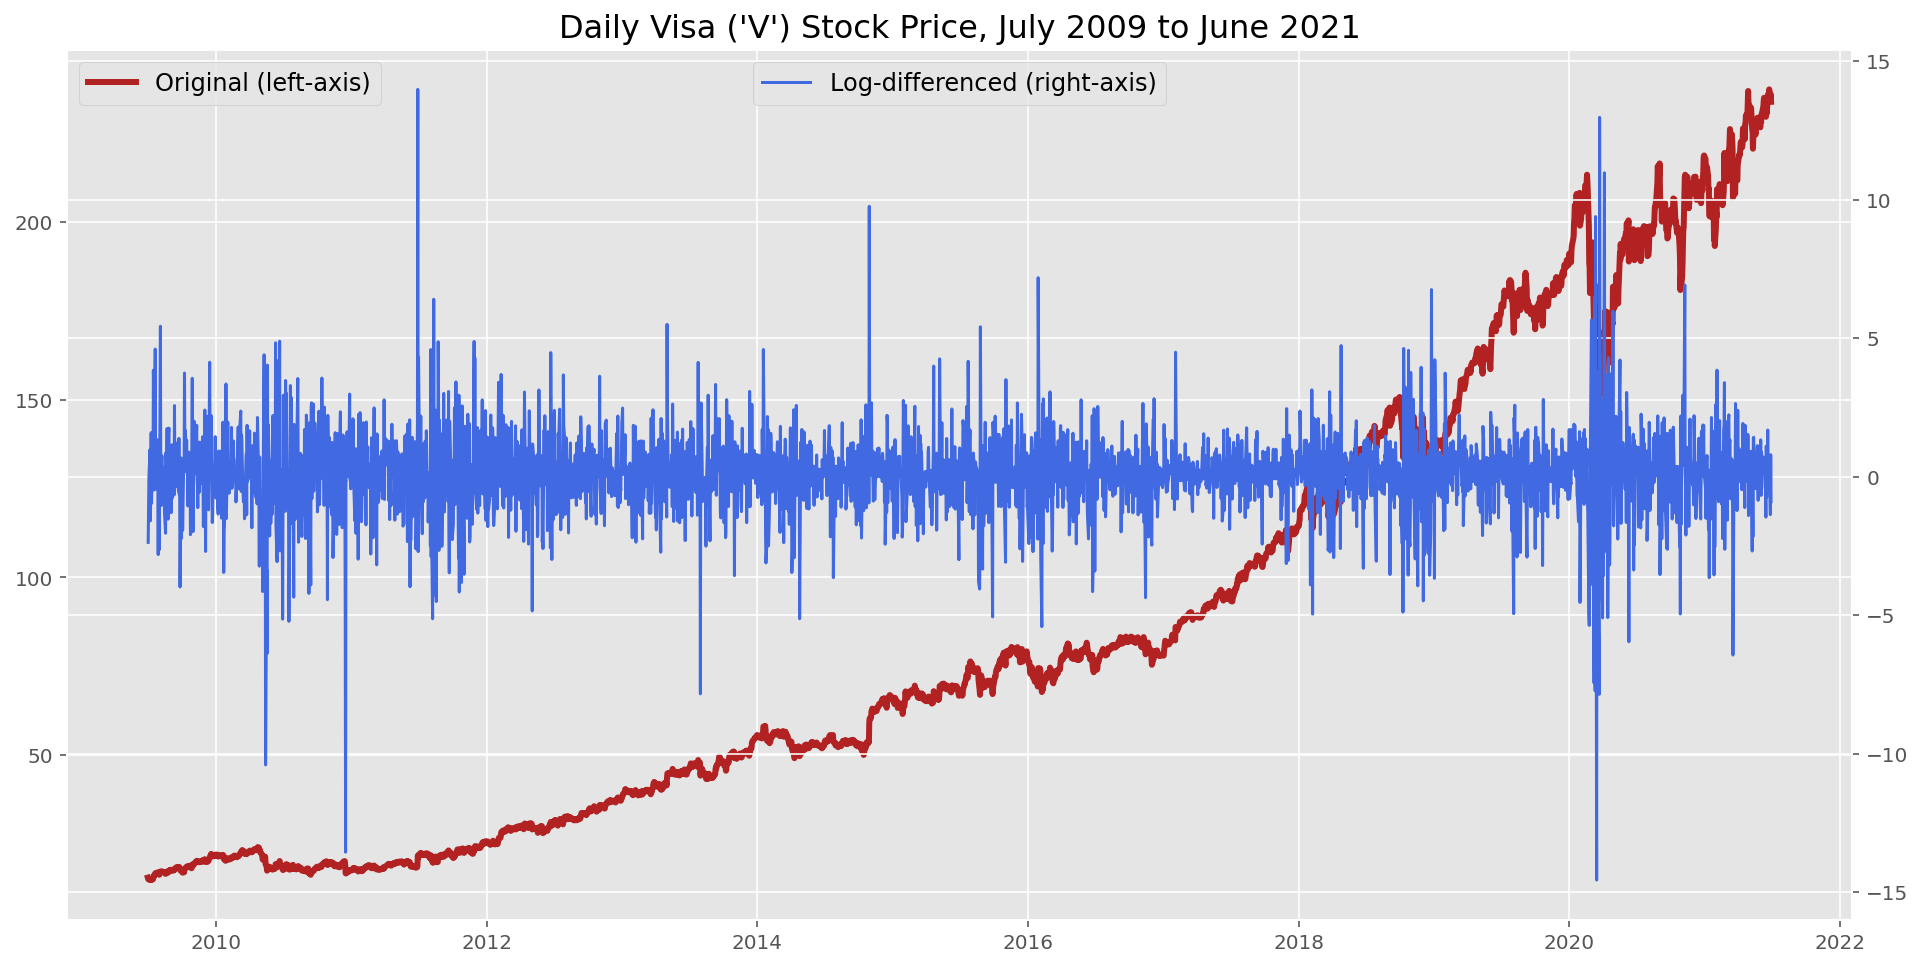

In [16]:
fig, ax1 = plt.subplots(figsize=(16,8))
ax2 = ax1.twinx()

ax1.plot(df.visa, lw='3', color='firebrick', label='Original (left-axis)')
ax2.plot(df1.visa, color='royalblue', label='Log-differenced (right-axis)')

ax1.legend(loc='upper left', fontsize=12)
ax2.legend(loc='upper center', fontsize=12)
plt.title("Daily Visa ('V') Stock Price, July 2009 to June 2021", fontsize=16);

In [17]:
# Putting transformed data together again
df = pd.concat([df1, df2], axis = 1)

In [18]:
# Delete the first row of null values following transformations
df = df.iloc[1:]

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3122 entries, 2009-07-01 to 2021-06-30
Data columns (total 43 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   mmm        3122 non-null   float64
 1   axp        3122 non-null   float64
 2   aapl       3122 non-null   float64
 3   ba         3122 non-null   float64
 4   amgn       3122 non-null   float64
 5   cat        3122 non-null   float64
 6   cvx        3122 non-null   float64
 7   csco       3122 non-null   float64
 8   ko         3122 non-null   float64
 9   pfe        3122 non-null   float64
 10  gs         3122 non-null   float64
 11  hd         3122 non-null   float64
 12  hon        3122 non-null   float64
 13  ibm        3122 non-null   float64
 14  intc       3122 non-null   float64
 15  jnj        3122 non-null   float64
 16  jpm        3122 non-null   float64
 17  mcd        3122 non-null   float64
 18  mrk        3122 non-null   float64
 19  msft       3122 non-null   flo

In [20]:
adf_tests(df)

Null hypothesis of non-stationarity is rejected for ALL series with p-values < 5%


### All variables may now be assumed to be stationary

In [21]:
# Splitting the macro variables to a separate DF for later analysis
df_macro = df[['spx', 'spx_value', 'dj_mom', 'dj_tech', 'spx_oil', 'vix',
               'oil', 'copper', 'us_ois', 'us_real10', 'us_yc']].copy()

In [22]:
df = df.drop(['spx', 'spx_value', 'dj_mom', 'dj_tech', 'spx_oil', 'vix', 
              'oil', 'copper', 'us_ois', 'us_real10', 'us_yc'], axis=1)

In [23]:
# No NaN values in the stationary equities data
df.isnull().values.any()

False

In [24]:
# No NaN values in the stationary macro data
df_macro.isnull().values.any()

False

In [25]:
df_station = remove_outliers(df)

# Dynamic Factor Model Setup

### Start with importing a definitions file containing additional information on the equity names

In [26]:
file = 'C:\\stocks_list.csv'
def_dj = pd.read_csv(file)

In [27]:
def_dj

,stock,sector,name
0,mmm,Manufacturing/Aerospace,3M
1,axp,Finance,American Express
2,aapl,Technology,Apple
3,ba,Manufacturing/Aerospace,Boeing
4,amgn,Health,Amgen
5,cat,Manufacturing/Aerospace,Caterpillar
6,cvx,Energy,Chevron Corp
7,csco,Technology,Cisco Systems
8,ko,Retail/Consumer,Coca-Cola
9,pfe,Health,Pfizer


Sectors are mostly balanced, except for the **Energy (oil)** sector, for which there are only 2 equity names, and the **Retail/Consumer** sector for which there are 9 names.

In [28]:
def_dj.groupby('sector', sort=False).count().rename({'description': '# sectors in portfolio'}, axis=1)

,stock,name
sector,,
Manufacturing/Aerospace,5,5
Finance,5,5
Technology,6,6
Health,5,5
Energy,2,2
Retail/Consumer,9,9


Set the **number and names of the factors** to be estimated in a list

In [29]:
factors = ['factor01', 'factor02', 'factor03']

Set the **number of autoregressive (AR) lag processes**, and 8 had the best AIC score

In [30]:
factor_orders = 8

In [31]:
endog_dj = df_station.reset_index(drop=True)

The default model provides for independent AR(1) processes for the idiosyncratic error terms, and data standardization.

In [32]:
model = sm.tsa.DynamicFactorMQ(endog_dj, factors=factors, factor_orders=factor_orders, standardize=True)

In [33]:
model.summary()

Model:,Dynamic Factor Model,# of observed variables:,32
,+ 3 factors in 3 blocks,# of factor blocks:,3
,+ AR(1) idiosyncratic,Idiosyncratic disturbances:,AR(1)
Sample:,0,Standardize variables:,True
,- 3122,,
Dep. variable,factor01,factor02,factor03
mmm,X,X,X
axp,X,X,X
aapl,X,X,X
ba,X,X,X
amgn,X,X,X


In [34]:
results = model.fit(disp=10)

EM start iterations, llf=-1.1829e+05
EM iteration 10, llf=-1.1409e+05, convergence criterion=3.147e-06
EM iteration 20, llf=-1.1409e+05, convergence criterion=9.6106e-07
EM converged at iteration 20, llf=-1.1409e+05, convergence criterion=9.6106e-07 < tolerance=1e-06


In [35]:
results.summary(display_diagnostics=True)

<class 'statsmodels.iolib.summary.Summary'>
"""
                               Dynamic Factor Results                              
===================================================================================
Dep. Variable:          "mmm", and 31 more   No. Observations:                 3122
Model:                Dynamic Factor Model   Log Likelihood             -114090.624
                   + 3 factors in 3 blocks   AIC                         228555.249
                     + AR(1) idiosyncratic   BIC                         229685.893
Date:                     Sat, 24 Jul 2021   HQIC                        228961.115
Time:                             10:44:26   EM Iterations                       20
Sample:                                  0                                         
                                    - 3122                                         
Covariance Type:              Not computed                                         
                                Observation equation:                                
=====================================================================================
Factor loadings:   factor01   factor02   factor03    idiosyncratic: AR(1)        var.
-------------------------------------------------------------------------------------
             mmm       0.21      -0.07      -0.05                   -0.00        0.39
             axp       0.20      -0.16       0.00                    0.00        0.39
            aapl       0.15       0.06       0.26                    0.02        0.56
              ba       0.18      -0.14       0.01                   -0.01        0.55
            amgn       0.16       0.19       0.01                   -0.03        0.58
             cat       0.19      -0.18       0.02                   -0.00        0.40
             cvx       0.19      -0.16      -0.18                   -0.02        0.41
            csco       0.20       0.03       0.13                   -0.03        0.43
              ko       0.17       0.13      -0.17                   -0.02        0.50
             pfe       0.17       0.17      -0.12                   -0.01        0.54
              gs       0.19      -0.20       0.04                   -0.01        0.39
              hd       0.18       0.08       0.09                    0.01        0.53
             hon       0.23      -0.12       0.02                   -0.09        0.28
             ibm       0.19       0.01       0.00                    0.01        0.49
            intc       0.17       0.03       0.18                   -0.03        0.53
             jnj       0.18       0.20      -0.15                   -0.03        0.45
             jpm       0.20      -0.20      -0.02                   -0.07        0.33
             mcd       0.16       0.13      -0.02                   -0.03        0.63
             mrk       0.16       0.19      -0.14                    0.01        0.52
            msft       0.18       0.11       0.26                   -0.03        0.40
             nke       0.18       0.04       0.14                   -0.05        0.56
              pg       0.16       0.22      -0.15                    0.00        0.54
             crm       0.16       0.04       0.27                   -0.04        0.52
             trv       0.19      -0.07      -0.14                   -0.00        0.48
             unh       0.16       0.07      -0.02                    0.01        0.68
              vz       0.15       0.13      -0.19                    0.02        0.61
            visa       0.19       0.04       0.17                   -0.10        0.47
             wba       0.15       0.02      -0.06                    0.03        0.68
             wmt       0.14       0.18      -0.06                    0.00        0.68
             dis       0.19      -0.05       0.05                   -0.07        0.50
             rtx       0.21      -0.14      -0.01                   -0.05        0.38
             xom  

The **Ljung-Box test** posits the null hypothesis that the residuals are not autocorrelated. The Prob(Q) are the p-values corresponding to each variable, and we **cannot reject the null hypothesis of no autocorrelation** for any of them.

The **Jarque-Bera test** posits the null hypothesis that the residuals are normally distributed. The p-values uniformly **reject the null hypothesis of normality**.

In [36]:
results.factors.smoothed.head()

,factor01,factor02,factor03
0,1.994018,1.573134,0.232349
1,-10.959370,0.118236,1.471476
2,-0.290846,-0.253915,0.030770
3,2.504505,0.679455,-2.109683
4,-7.623477,1.916702,-0.906133


In [37]:
# Assigning the estimated factors to a DataFrame
dj_smoothed = results.factors.smoothed

# Data Visualization

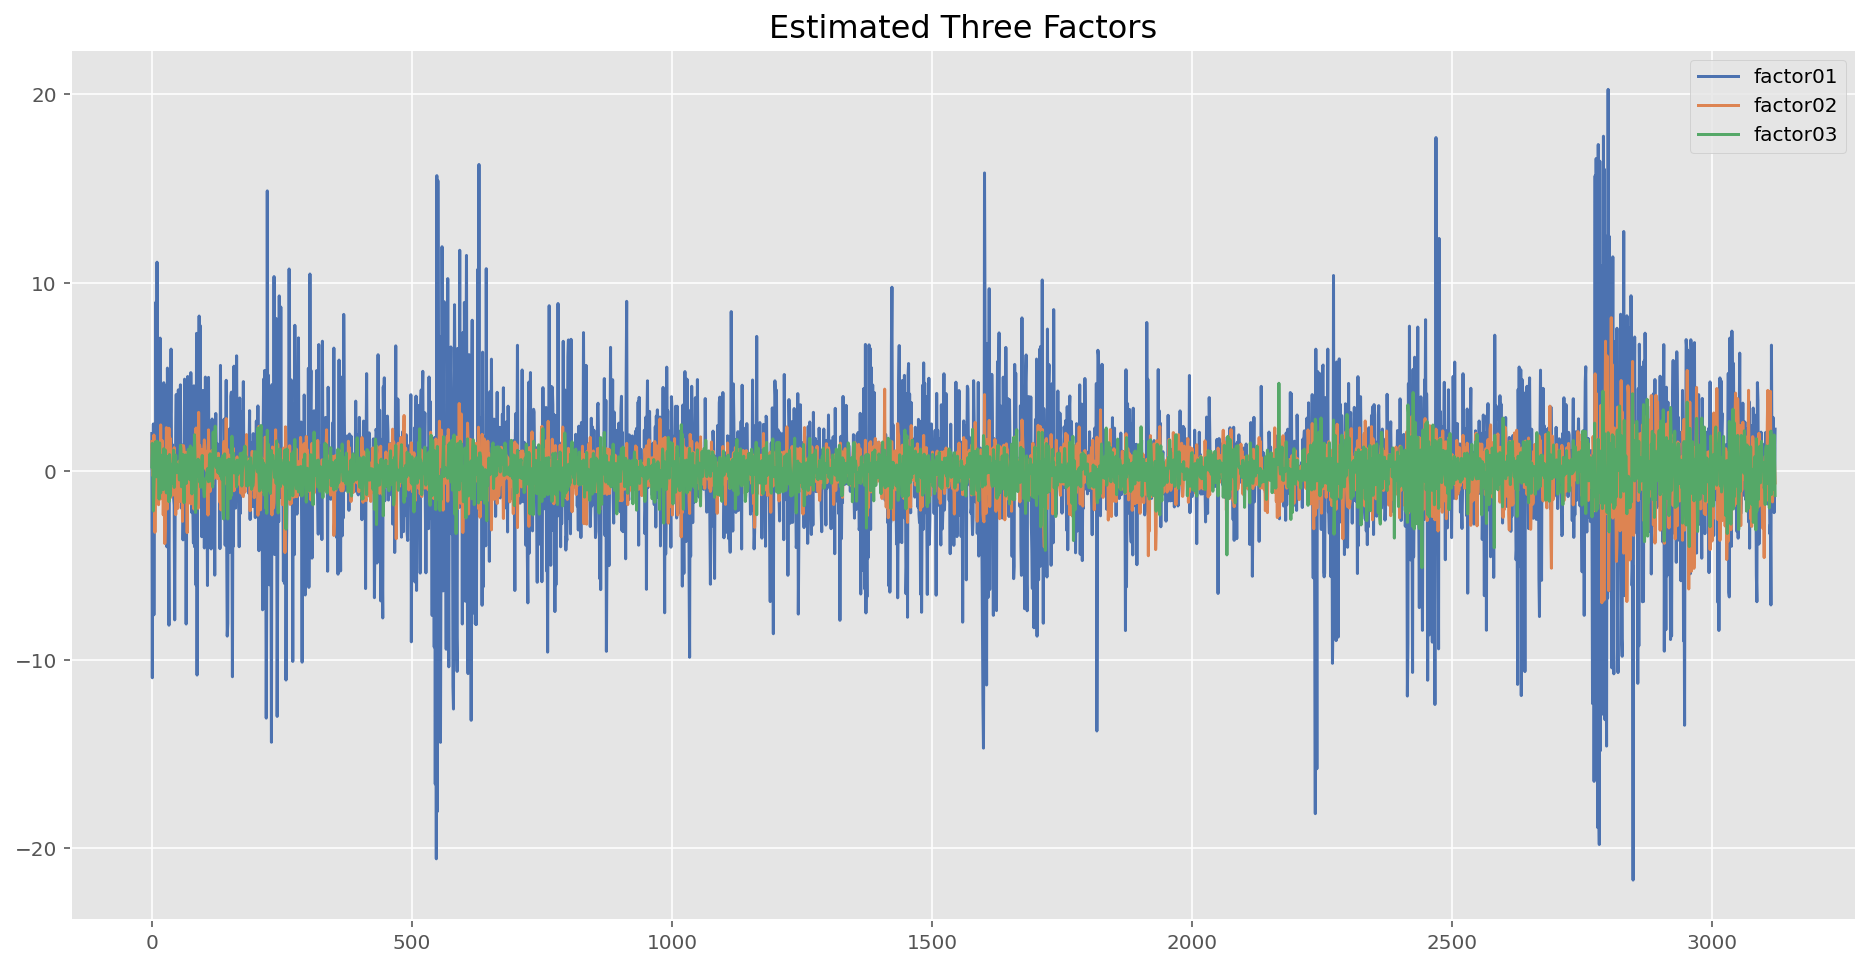

In [38]:
with sns.color_palette('deep'):
    fig, ax = plt.subplots(figsize=(16, 8))
    dj_smoothed.plot(ax=ax)
    
    plt.title('Estimated Three Factors', fontsize=16);

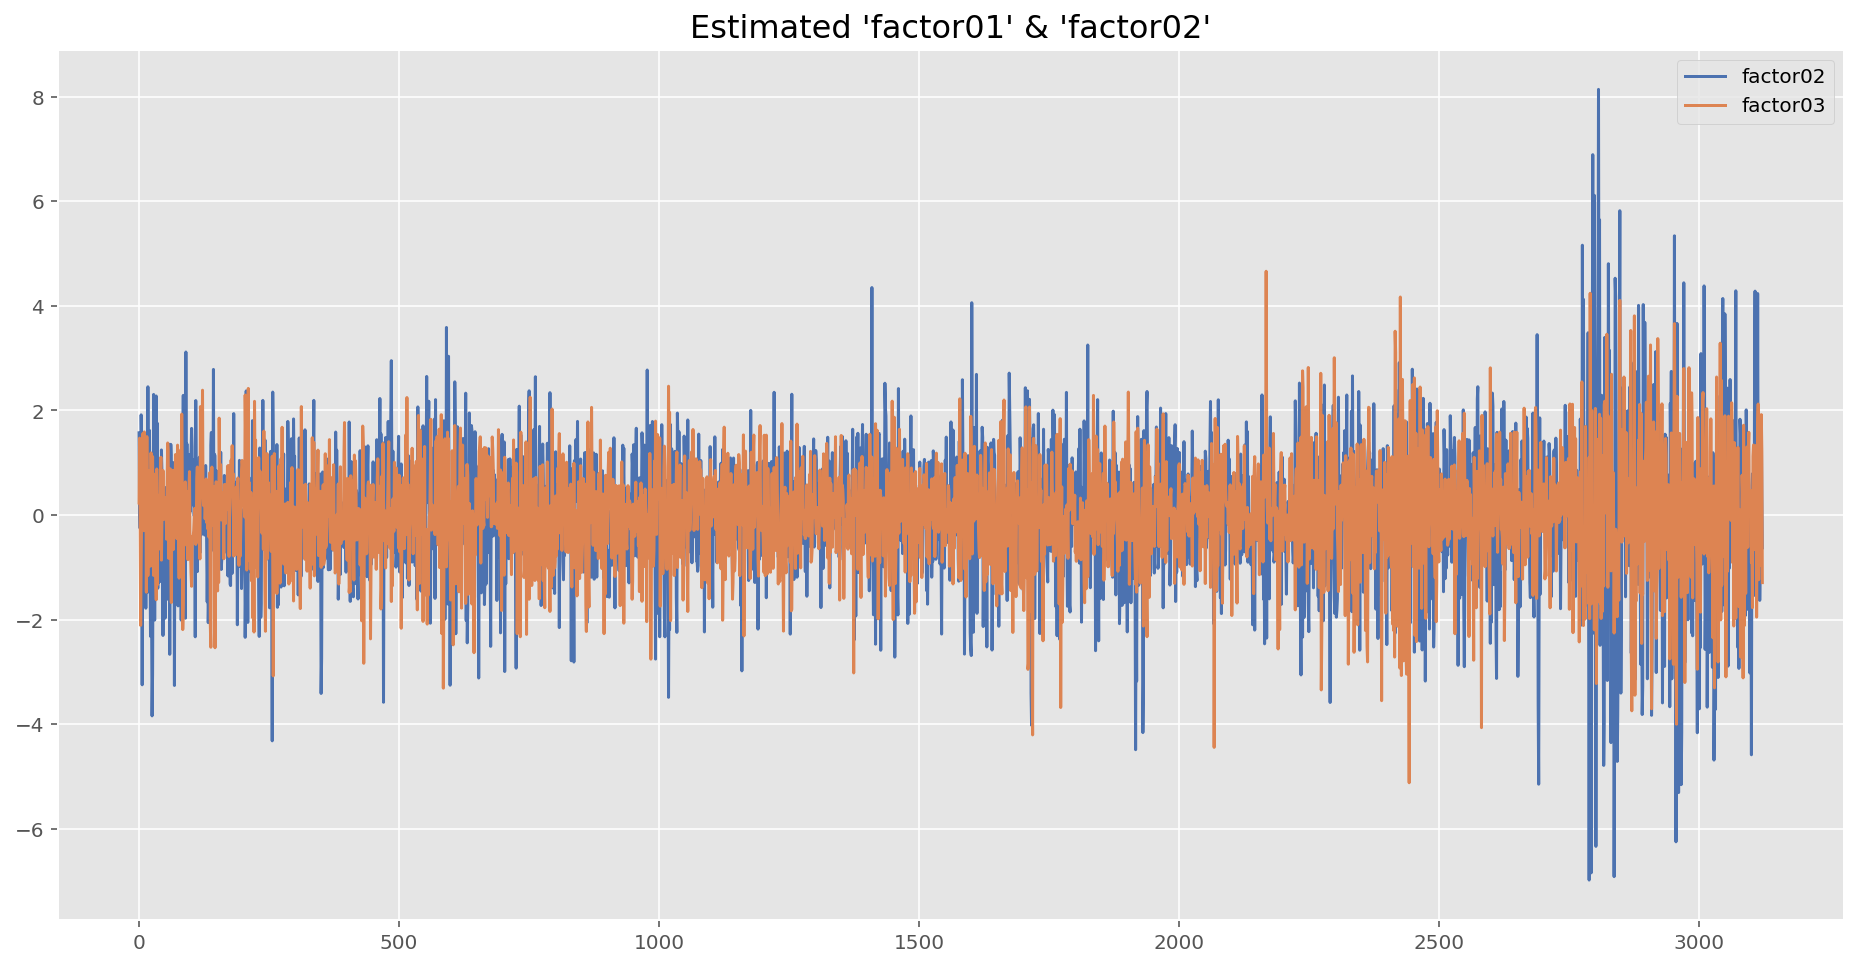

In [39]:
# Focusing on the latter two factors
with sns.color_palette('deep'):
    fig, ax = plt.subplots(figsize=(16, 8))
    dj_smoothed[['factor02', 'factor03']].plot(ax=ax)
    
    plt.title("Estimated 'factor01' & 'factor02'", fontsize=16);

# Analyzing the Estimated Factors

### Check factors' R-squared on individual stocks

In [40]:
rsquared = results.get_coefficients_of_determination(method='individual')
rsquared.columns = factors

In [41]:
ordered_rsquared = []
for factors in rsquared.columns:
    top_factor = (rsquared[factors].sort_values(ascending=False)
                                       .round(2).reset_index())
    top_factor.columns = pd.MultiIndex.from_product([
        [f'Ordered stocks explained by {factors}'],
        ['stock', r'$R^2$']])
    ordered_rsquared.append(top_factor)

In [42]:
df_rsquared = pd.concat(ordered_rsquared, axis=1)
df_rsquared

Ordered stocks explained by factor01        \
                                  stock $R^2$   
0                                   hon  0.71   
1                                   mmm  0.62   
2                                   rtx  0.60   
3                                   jpm  0.60   
4                                   axp  0.57   
5                                  csco  0.55   
6                                   cat  0.55   
7                                    gs  0.53   
8                                   ibm  0.53   
9                                   dis  0.51   
10                                  cvx  0.51   
11                                  xom  0.50   
12                                 visa  0.50   
13                                  trv  0.49   
14                                 msft  0.48   
15                                   hd  0.46   
16                                  jnj  0.44   
17                                   ko  0.43   
18                                  nke  0.43   
19                                 intc  0.42   
20                                   ba  0.41   
21                                  pfe  0.39   
22                                  mrk  0.38   
23                                  crm  0.35   
24                                  mcd  0.35   
25                                 amgn  0.34   
26                                   pg  0.33   
27                                  unh  0.33   
28                                 aapl  0.32   
29                                  wba  0.32   
30                                   vz  0.31   
31                                  wmt  0.24   

   Ordered stocks explained by factor02        \
                                  stock $R^2$   
0                                    gs  0.14   
1                                   jpm  0.14   
2                                    pg  0.13   
3                                   cat  0.11   
4                                  amgn  0.11   
5                                   jnj  0.10   
6                                   mrk  0.10   
7                                   wmt  0.10   
8                                   axp  0.09   
9                                   xom  0.08   
10                                  cvx  0.08   
11                                  pfe  0.08   
12                                   ba  0.07   
13                                  rtx  0.06   
14                                  hon  0.04   
15                                   vz  0.04   
16                                   ko  0.04   
17                                  mcd  0.04   
18                                 msft  0.03   
19                                  trv  0.02   
20                                  mmm  0.02   
21                                  dis  0.01   
22                                   hd  0.01   
23                                  unh  0.01   
24                                 aapl  0.01   
25                                  crm  0.00   
26                                  nke  0.00   
27                                 intc  0.00   
28                                 visa  0.00   
29                                 csco  0.00   
30                                  wba  0.00   
31                                  ibm  0.00   

   Ordered stocks explained by factor03        
                                  stock $R^2$  
0                                   crm  0.20  
1                                  aapl  0.17  
2                                  msft  0.16  
3                                    vz  0.09  
4                                   xom  0.08  
5                                    ko  0.08  
6                                  intc  0.08  
7                                   cvx  0.07  
8                                   jnj  0.06  
9                                  visa  0.06  
10                                   pg  0.06  
11                                  mrk  0.05

In [43]:
factors = ['factor01', 'factor02', 'factor03']

In [44]:
cum_rsquared = results.get_coefficients_of_determination(method='cumulative')
cum_rsquared.columns = factors

In [45]:
ordered_cum_rsquared = []
for factors in cum_rsquared.columns:
    top_factor = (cum_rsquared[factors].sort_values(ascending=False)
                                       .round(2).reset_index())
    top_factor.columns = pd.MultiIndex.from_product([
        [f'Ordered stocks explained by cumulative {factors}'],
        ['stock', r'$R^2$']])
    ordered_cum_rsquared.append(top_factor)

In [46]:
df_cum_rsquared = pd.concat(ordered_cum_rsquared, axis=1)
df_cum_rsquared

Ordered stocks explained by cumulative factor01        \
                                             stock $R^2$   
0                                              hon  0.71   
1                                              mmm  0.62   
2                                              rtx  0.60   
3                                              jpm  0.60   
4                                              axp  0.57   
5                                             csco  0.55   
6                                              cat  0.55   
7                                               gs  0.53   
8                                              ibm  0.53   
9                                              dis  0.51   
10                                             cvx  0.51   
11                                             xom  0.50   
12                                            visa  0.50   
13                                             trv  0.49   
14                                            msft  0.48   
15                                              hd  0.46   
16                                             jnj  0.44   
17                                              ko  0.43   
18                                             nke  0.43   
19                                            intc  0.42   
20                                              ba  0.41   
21                                             pfe  0.39   
22                                             mrk  0.38   
23                                             crm  0.35   
24                                             mcd  0.35   
25                                            amgn  0.34   
26                                              pg  0.33   
27                                             unh  0.33   
28                                            aapl  0.32   
29                                             wba  0.32   
30                                              vz  0.31   
31                                             wmt  0.24   

   Ordered stocks explained by cumulative factor02        \
                                             stock $R^2$   
0                                              hon  0.74   
1                                              jpm  0.72   
2                                               gs  0.65   
3                                              rtx  0.65   
4                                              axp  0.65   
5                                              cat  0.64   
6                                              mmm  0.63   
7                                              xom  0.57   
8                                              cvx  0.57   
9                                              jnj  0.57   
10                                            csco  0.56   
11                                             ibm  0.53   
12                                            msft  0.53   
13                                             dis  0.51   
14                                             trv  0.50   
15                                            visa  0.50   
16                                             mrk  0.49   
17                                              pg  0.49   
18                                              ko  0.48   
19                                             pfe  0.48   
20                                              hd  0.48   
21                                              ba  0.47   
22                                            amgn  0.46   
23                                             nke  0.43   
24                                            intc  0.43   
25                                             mcd  0.39   
26                                             crm  0.36   
27                                              vz  0.36   
28                                             wmt  0.35   
29                                             unh  0.34   
30                                        

### Check factors' R-squared on sectors

In [47]:
# Let's try to map the Sector to the various stock tickers to see if they help explain the factors
# Start with Factor 1
df_rsquared01 = df_rsquared.iloc[:,:2]
df_rsquared01.columns = df_rsquared01.columns.droplevel(0) # Eliminate the multiindex title

In [48]:
df_rsquared01['stock'] = df_rsquared01['stock'].map(def_dj.set_index('stock')['sector'])

In [49]:
# Now for Factor 2
df_rsquared02 = df_rsquared.iloc[:,2:4]
df_rsquared02.columns = df_rsquared02.columns.droplevel(0) # Eliminate the multiindex title

In [50]:
df_rsquared02['stock'] = df_rsquared02['stock'].map(def_dj.set_index('stock')['sector'])

In [51]:
# Factor 3
df_rsquared03 = df_rsquared.iloc[:,4:]
df_rsquared03.columns = df_rsquared03.columns.droplevel(0) # Eliminate the multiindex title

In [52]:
df_rsquared03['stock'] = df_rsquared03['stock'].map(def_dj.set_index('stock')['sector'])

In [53]:
pd.concat([df_rsquared01, df_rsquared02, df_rsquared03], axis=1)

,stock,$R^2$,stock,$R^2$,stock,$R^2$
0,Manufacturing/Aerospace,0.71,Finance,0.14,Technology,0.20
1,Manufacturing/Aerospace,0.62,Finance,0.14,Technology,0.17
2,Manufacturing/Aerospace,0.60,Retail/Consumer,0.13,Technology,0.16
3,Finance,0.60,Manufacturing/Aerospace,0.11,Retail/Consumer,0.09
4,Finance,0.57,Health,0.11,Energy,0.08
5,Technology,0.55,Health,0.10,Retail/Consumer,0.08
6,Manufacturing/Aerospace,0.55,Health,0.10,Technology,0.08
7,Finance,0.53,Retail/Consumer,0.10,Energy,0.07
8,Technology,0.53,Finance,0.09,Health,0.06
9,Retail/Consumer,0.51,Energy,0.08,Finance,0.06


### Further analysis

In [54]:
dj_smoothed['date'] = df.index

In [55]:
dj_smoothed['date'] = pd.to_datetime(dj_smoothed.date, format='%d/%m/%Y').dt.to_period('D')

In [56]:
# Setting Date Index
dj_smoothed.set_index('date', inplace=True)
dj_smoothed.index = dj_smoothed.index.to_timestamp()

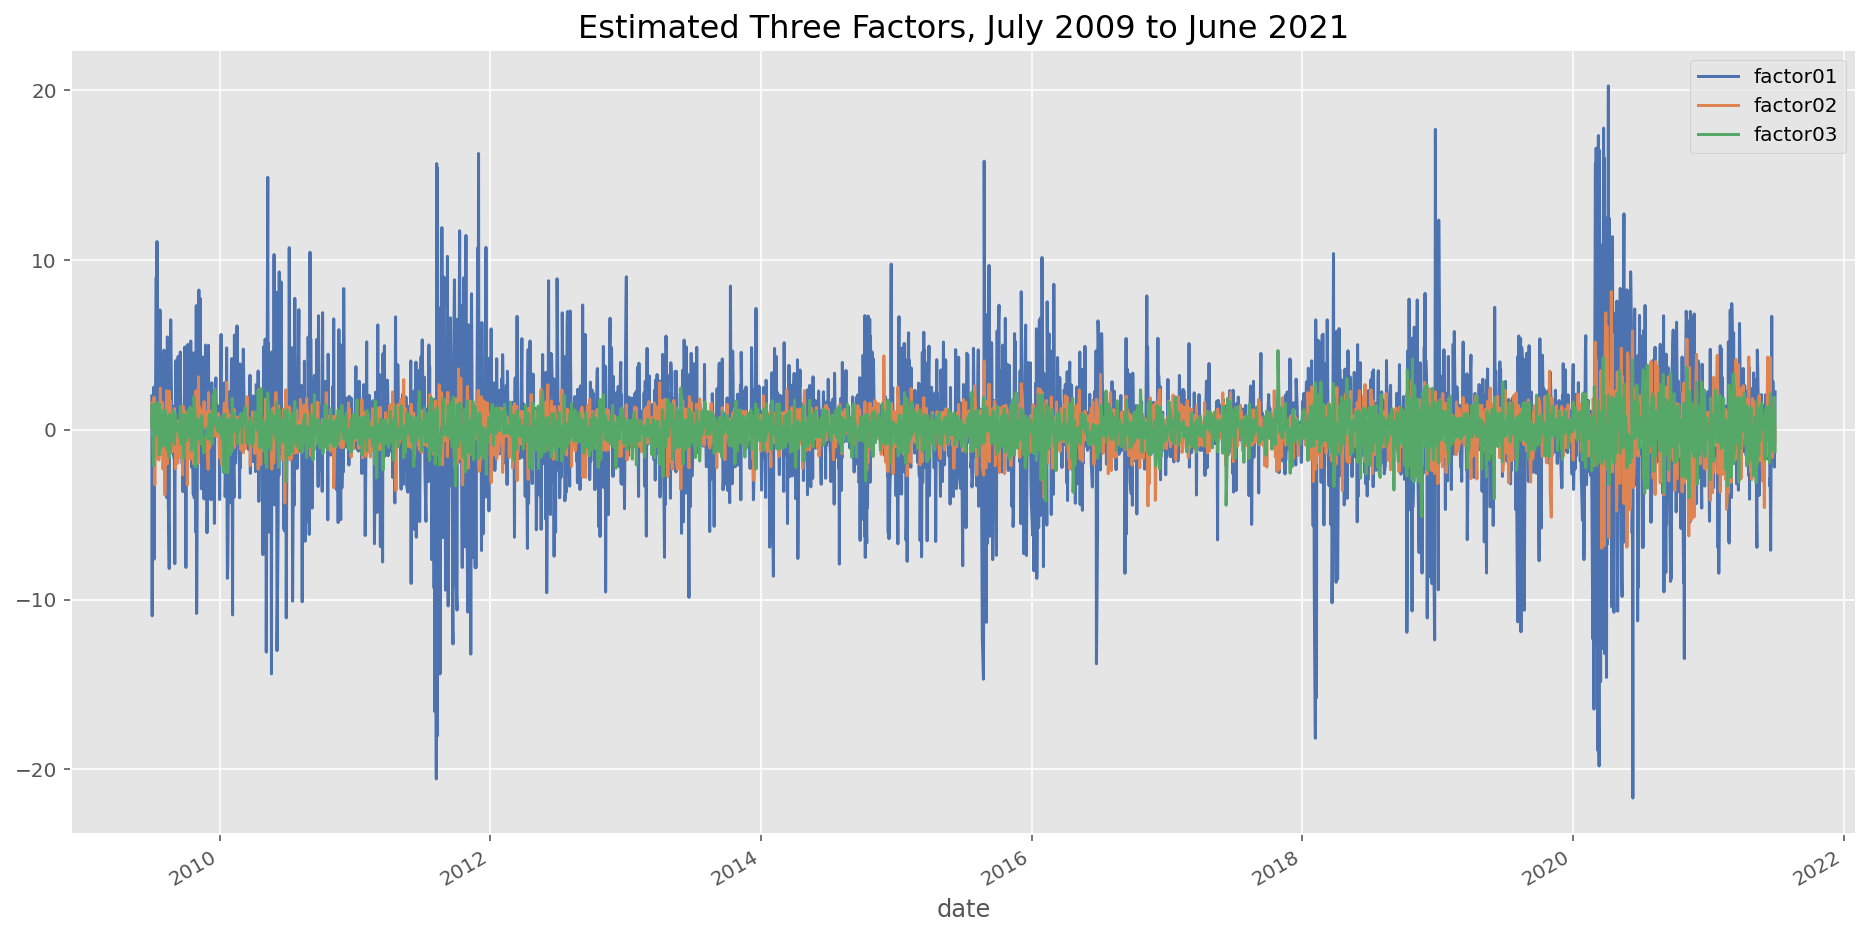

In [57]:
# Redo factors' chart with DateTime
with sns.color_palette('deep'):
    fig, ax = plt.subplots(figsize=(16, 8))
    dj_smoothed.plot(ax=ax)
    
    plt.title('Estimated Three Factors, July 2009 to June 2021', fontsize=16);

C:\Users\camb7\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


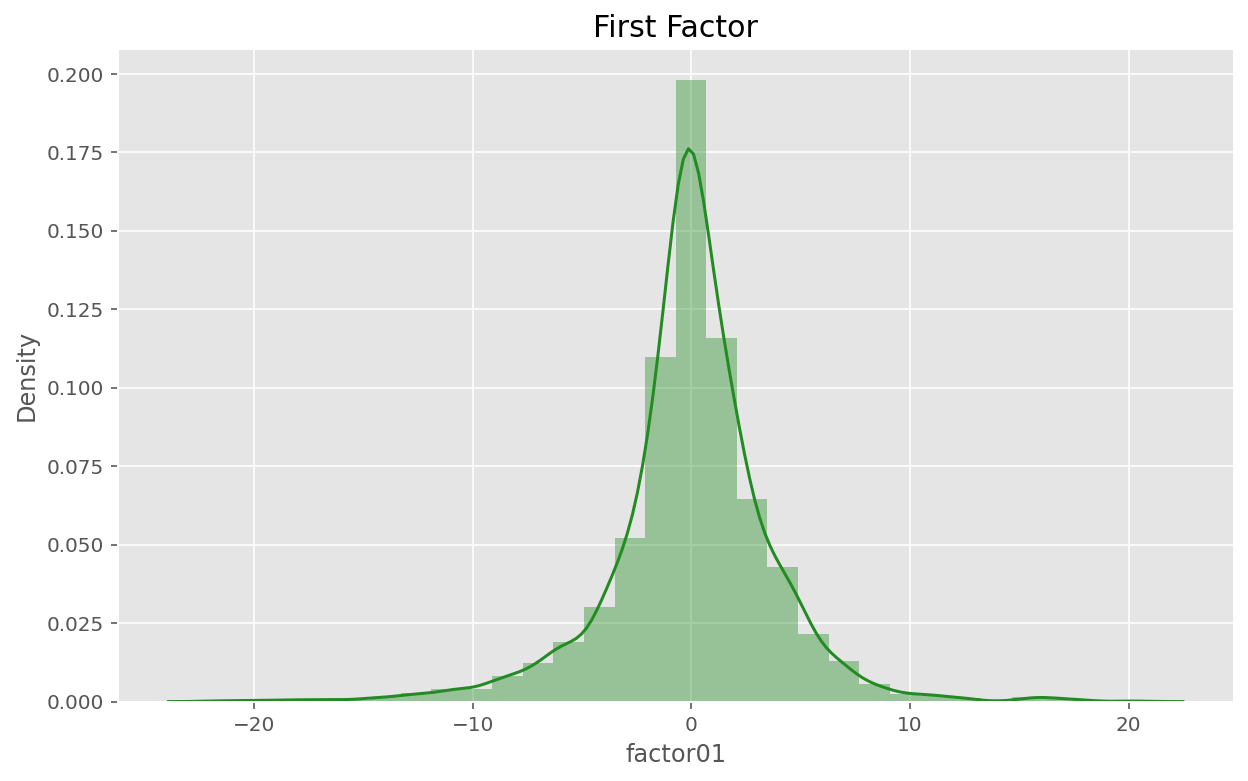

In [58]:
fig, ax = plt.subplots(figsize=(10,6))

sns.distplot(dj_smoothed.factor01, bins=30, kde=True, ax=ax, color='forestgreen')
plt.title('First Factor', fontsize=15);

C:\Users\camb7\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


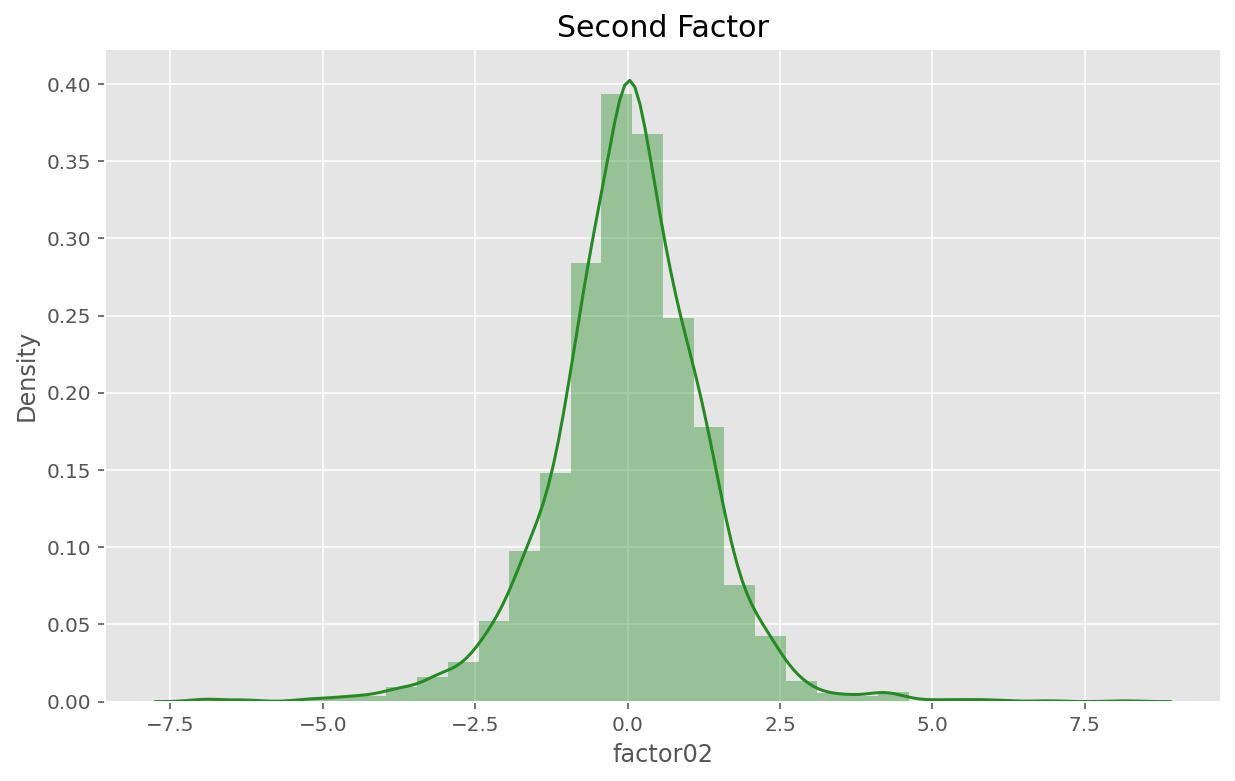

In [59]:
fig, ax = plt.subplots(figsize=(10,6))

sns.distplot(dj_smoothed.factor02, bins=30, kde=True, ax=ax, color='forestgreen')
plt.title('Second Factor', fontsize=15);

C:\Users\camb7\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


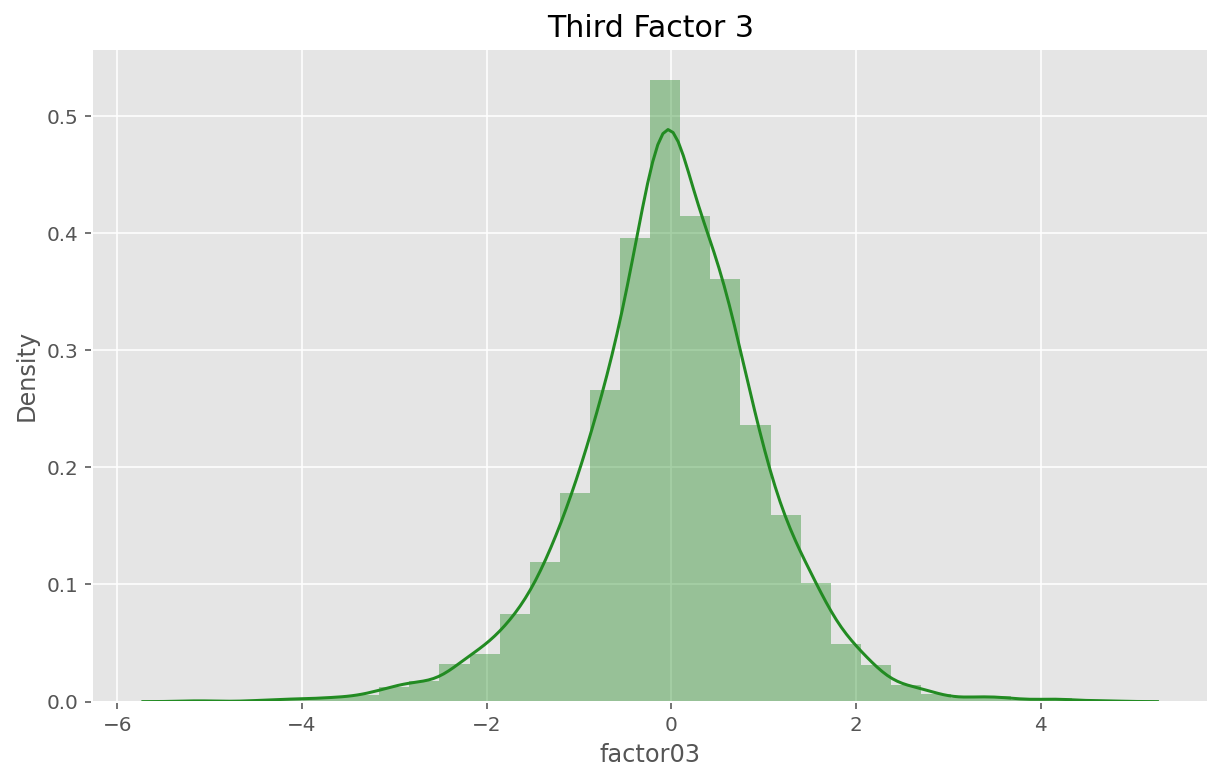

In [60]:
fig, ax = plt.subplots(figsize=(10,6))

sns.distplot(dj_smoothed.factor03, bins=30, kde=True, ax=ax, color='forestgreen')
plt.title('Third Factor 3', fontsize=15);

In [61]:
# Easy to join the DataFrames given that both have a common index
df = df.join(dj_smoothed)

### Example of MSFT-MCD regression

In [62]:
y = df.msft

In [63]:
x = df[['mcd']]

In [64]:
model = sm.OLS(y, sm.add_constant(x))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   msft   R-squared:                       0.208
Model:                            OLS   Adj. R-squared:                  0.208
Method:                 Least Squares   F-statistic:                     819.4
Date:                Sat, 24 Jul 2021   Prob (F-statistic):          3.26e-160
Time:                        10:44:29   Log-Likelihood:                -5466.0
No. Observations:                3122   AIC:                         1.094e+04
Df Residuals:                    3120   BIC:                         1.095e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0509      0.025      2.038      0.0

In [65]:
x = df[['mcd', 'factor01', 'factor02', 'factor03']]

In [66]:
model = sm.OLS(y, sm.add_constant(x))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   msft   R-squared:                       0.650
Model:                            OLS   Adj. R-squared:                  0.649
Method:                 Least Squares   F-statistic:                     1444.
Date:                Sat, 24 Jul 2021   Prob (F-statistic):               0.00
Time:                        10:44:29   Log-Likelihood:                -4193.4
No. Observations:                3122   AIC:                             8397.
Df Residuals:                    3117   BIC:                             8427.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0749      0.017      4.508      0.0

### Adding factor estimates to df_macro dataset

In [67]:
df_macro.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3122 entries, 2009-07-01 to 2021-06-30
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   spx        3122 non-null   float64
 1   spx_value  3122 non-null   float64
 2   dj_mom     3122 non-null   float64
 3   dj_tech    3122 non-null   float64
 4   spx_oil    3122 non-null   float64
 5   vix        3122 non-null   float64
 6   oil        3122 non-null   float64
 7   copper     3122 non-null   float64
 8   us_ois     3122 non-null   float64
 9   us_real10  3122 non-null   float64
 10  us_yc      3122 non-null   float64
dtypes: float64(11)
memory usage: 372.7 KB


In [68]:
df_macro = df_macro.join(dj_smoothed)

In [69]:
df_macro

,spx,spx_value,dj_mom,dj_tech,spx_oil,vix,oil,copper,us_ois,us_real10,us_yc,factor01,factor02,factor03
date,,,,,,,,,,,,,,
2009-07-01,0.435243,0.404485,0.548698,0.709637,0.264037,-0.494580,-0.833338,2.493022,-6.69,3.51,7.53,1.994018,1.573134,0.232349
2009-07-02,-2.957765,-3.240301,-2.914849,-2.322769,-4.240975,6.389472,-3.793457,-1.085787,-7.33,4.21,1.43,-10.959370,0.118236,1.471476
2009-07-03,0.000000,-0.000404,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.78,-0.01,0.41,-0.290846,-0.253915,0.030770
2009-07-06,0.256248,0.492937,-0.093941,-0.537630,-2.951456,3.687863,-4.099060,-1.739940,-3.86,4.26,4.79,2.504505,0.679455,-2.109683
2009-07-07,-1.987985,-1.866508,-1.706203,-2.470537,-2.730256,6.184092,-1.764103,-1.635158,-3.14,-6.36,-7.58,-7.623477,1.916702,-0.906133
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-24,0.579434,0.666715,1.447309,0.666377,1.582185,-2.167939,0.300588,-0.451311,1.46,3.69,0.09,2.857260,-0.835063,-0.304521
2021-06-25,0.332507,0.737552,-0.382688,-0.197863,1.171340,-2.215982,1.017993,-0.441707,1.55,-1.12,3.41,1.062054,0.693455,-0.961221
2021-06-28,0.231237,-0.620716,1.011241,1.482320,-4.509653,0.892294,-1.551474,-0.326721,-1.90,-2.27,-3.58,-2.202163,1.892326,1.920570


In [70]:
df_macro['date'] = df_macro.index

In [71]:
#df_macro.to_csv(r'C:\\factors.csv', index=False)

In [72]:
#df.to_csv(r'C:\\stocks_&_factors.csv', index=False)